#  Pre-Processing of given dataset

In [1]:
#import libraries for access and functional purpose
import pandas as p
import numpy as n
import matplotlib.pyplot as plt

import seaborn as s

In [2]:
#read the given dataset
df = p.read_csv("df.csv")

Spliting Train/Test:

In [3]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='class', axis=1)


In [4]:
#Response variable
y = df.loc[:,'class'] 

In [5]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of testing dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  280
Number of testing dataset:  120
Total number of dataset:  400


In [6]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [7]:
df['detection'] = df['class'].map({'ckd':1,'notckd':0, 'ckd\t':1})
df['detectionofpc'] = df['pc'].map({'abnormal':1,'normal':0})
df['detectionrbc'] = df['rbc'].map({'abnormal':1,'normal':0})
df['detectionrpcc'] = df['pcc'].map({'present':1,'notpresent':0})
df['detectionba'] = df['ba'].map({'present':1,'notpresent':0})
df['detectionhtn'] = df['htn'].map({'yes':1,'no':0})
df['detectiondm'] = df['dm'].map({'yes':1,'no':0})
df['detectioncad'] = df['cad'].map({'yes':1,'no':0})
df['detectionpe'] = df['pe'].map({'yes':1,'no':0})
df['detectionane'] = df['ane'].map({'yes':1,'no':0})
df['detectionapp'] = df['appet'].map({'good':1,'poor':0})


In [8]:
probability = df.pivot_table(values='detection', index = ['detectionofpc','detectionrbc','detectionrpcc','detectionba','detectionhtn','detectiondm','detectioncad','detectionpe','detectionane','detectionapp'])

In [9]:
from scipy import stats
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['age']=le.fit_transform(df['age'].astype(str))
stats.mode(df['age'])


ModeResult(mode=array([50]), count=array([19]))

In [10]:
le

LabelEncoder()

Text(0.5, 1.0, 'Age of distribution of patients')

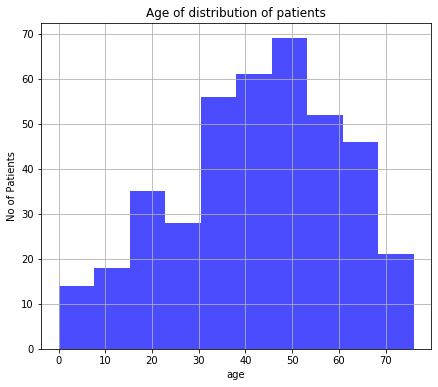

In [11]:
#Histogram Plot of Age distribution
df['age'].hist(figsize=(7,6), color='blue', alpha=0.7)
plt.xlabel('age')
plt.ylabel('No of Patients')
plt.title('Age of distribution of patients')

To validate Age values

In [12]:
#Checking minimum or maximum age
print("Minimum age is:", df.age.min())
print("Maximun age is:", df.age.max())

Minimum age is: 0
Maximun age is: 76


In [13]:
#check the age range
print("Age range:", sorted(df['age'].unique()))

Age range: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]


In [14]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class', 'detection', 'detectionofpc',
       'detectionrbc', 'detectionrpcc', 'detectionba', 'detectionhtn',
       'detectiondm', 'detectioncad', 'detectionpe', 'detectionane',
       'detectionapp'],
      dtype='object')

In [15]:
d = df["detection"]
bp = df["bp"]
ag = df["age"]
sg = df["sg"]

al=df['al']
su=df['su']
rbc=df['rbc']
pc=df['pc']
pcc=df['pcc']
hemo=df['hemo']
bgr=df['bgr']
wc=df['wc']
htn=df['htn']
dm=df['dm']
bu=df['bu']
pot=df['pot']
pcv=df['pcv']
rc=df['rc']
cad=df['cad']


C:\Users\SPIRO-PYTHON\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SPIRO-PYTHON\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


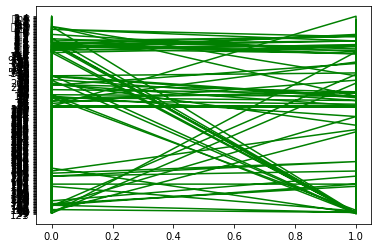

In [16]:

plt.plot(d, bgr, color='g')

plt.plot(d, htn, color='g')
plt.plot(d, dm, color='g')
plt.plot(d,bu, color='g')
plt.plot(d, pot, color='g')
plt.plot(d, pcv, color='g')
plt.plot(d, rc, color='g')
plt.plot(d, cad, color='g')

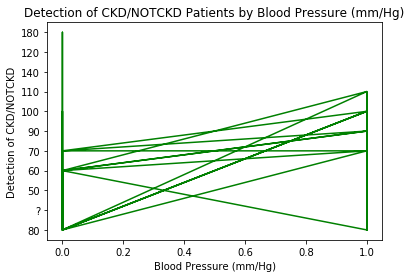

In [17]:
plt.plot(d, bp, color='g')

plt.xlabel('Blood Pressure (mm/Hg)')
plt.ylabel('Detection of CKD/NOTCKD')
plt.title('Detection of CKD/NOTCKD Patients by Blood Pressure (mm/Hg)')
plt.show()

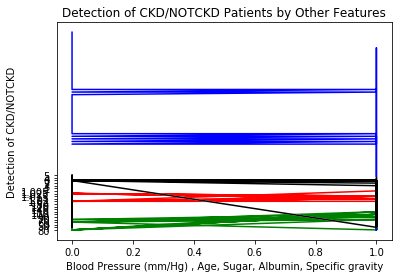

In [18]:
plt.plot(d, bp, color='g')
plt.plot(d, ag, color='b')
plt.plot(d, sg, color='r')
plt.plot(d, al, color='w')
plt.plot(d, su, color='black')






plt.xlabel('Blood Pressure (mm/Hg) , Age, Sugar, Albumin, Specific gravity')
plt.ylabel('Detection of CKD/NOTCKD')
plt.title('Detection of CKD/NOTCKD Patients by Other Features')
plt.show()

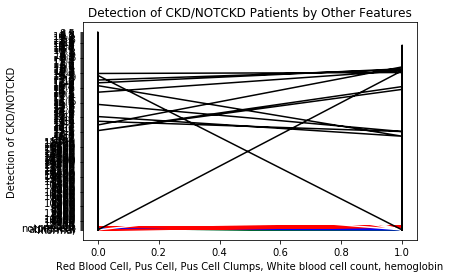

In [19]:
plt.plot(d, rbc, color='g')
plt.plot(d, pc, color='b')
plt.plot(d, pcc, color='r')
plt.plot(d, wc, color='w')
plt.plot(d, hemo, color='black')


plt.xlabel('Red Blood Cell, Pus Cell, Pus Cell Clumps, White blood cell count, hemoglobin')
plt.ylabel('Detection of CKD/NOTCKD')
plt.title('Detection of CKD/NOTCKD Patients by Other Features')
plt.show()

In [21]:
#read the given dataset
df = p.read_csv('df.csv', sep=',',na_values=['?'])


In [22]:
df['age'].replace('?', '',inplace=True)
df['bp'].replace('?', '',inplace=True)
df['sg'].replace('?', '',inplace=True)
df['al'].replace('?', '',inplace=True)
df['su'].replace('?', '',inplace=True)
df['rbc'].replace('?', '',inplace=True)
df['pc'].replace('?', '',inplace=True)
df['pcc'].replace('?', '',inplace=True)
df['ba'].replace('?', '',inplace=True)
df['bgr'].replace('?', '',inplace=True)
df['bu'].replace('?', '',inplace=True)
df['sc'].replace('?', '',inplace=True)
df['sod'].replace('?', '',inplace=True)
df['pot'].replace('?', '',inplace=True)
df['hemo'].replace('?', '',inplace=True)
df['pcv'].replace('?', '',inplace=True)
df['wc'].replace('?', '',inplace=True)
df['rc'].replace('?', '',inplace=True)
df['htn'].replace('?', '',inplace=True)
df['dm'].replace('?', '',inplace=True)
df['cad'].replace('?', '',inplace=True)
df['appet'].replace('?', '',inplace=True)
df['pe'].replace('?', '',inplace=True)
df['ane'].replace('?', '',inplace=True)
df['class'].replace('?', '',inplace=True)


In [23]:
df['detection'] = df['class'].map({'ckd':1,'notckd':0, 'ckd\t':1})

In [24]:
from scipy.stats import mode

df["rbc"].fillna(mode(df["rbc"].astype("str")).mode[0],inplace = True)
df["pc"].fillna(mode(df["pc"].astype("str")).mode[0],inplace = True)
df["pcc"].fillna(mode(df["pcc"].astype("str")).mode[0],inplace = True)
#df.LoanAmount.fillna(round(df.LoanAmount.mean(),2),inplace = True)
df["htn"].fillna(mode(df["htn"].astype("str")).mode[0],inplace = True)
df["dm"].fillna(mode(df["dm"].astype("str")).mode[0],inplace = True)
df["cad"].fillna(mode(df["cad"].astype("str")).mode[0],inplace=True)
df["appet"].fillna(mode(df["appet"].astype("str")).mode[0],inplace=True)
df["pe"].fillna(mode(df["pe"].astype("str")).mode[0],inplace=True)
df["ane"].fillna(mode(df["ane"].astype("str")).mode[0],inplace=True)
df["class"].fillna(mode(df["class"].astype("str")).mode[0],inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['rbc','pc','pcc','htn','dm','cad','appet','pe','ane','class','detection']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)


In [26]:
le

LabelEncoder()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.model_selection import train_test_split


In [28]:
#building predictive model 
#we will use scikit-learn (sklearn), for which we need to convert the categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
var_col = ['rbc','pc','pcc','htn','dm','cad','appet','pe','ane','class']
le = LabelEncoder()  #Encode labels with value between 0 and n_classes-1.
for i in var_col:
    df[i] = le.fit_transform(df[i]) #Fit label encoder and return encoded labels


In [29]:
df.head()

age    bp     sg   al   su  rbc  pc  pcc          ba    bgr  ...     wc  \
0  48.0  80.0  1.020  1.0  0.0    1   1    0  notpresent  121.0  ...   7800   
1   2.0   NaN  1.010  3.0  0.0    1   0    0  notpresent    NaN  ...    NaN   
2   3.0   NaN  1.010  2.0  0.0    1   1    0  notpresent    NaN  ...  12300   
3   4.0   NaN  1.020  1.0  0.0    1   1    0  notpresent   99.0  ...    \t?   
4   5.0   NaN  1.015  1.0  0.0    1   1    0  notpresent    NaN  ...    NaN   

    rc  htn  dm  cad appet pe ane  class  detection  
0  5.2    1   1    1     0  1   0      0          1  
1  NaN    0   0    1     0  2   0      0          1  
2  NaN    0   0    1     0  1   0      0          1  
3  NaN    0   0    1     0  1   0      0          1  
4  NaN    0   0    1     0  1   1      0          1  

[5 rows x 26 columns]